In [1]:
from typing import Dict, List, TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    final: str

In [3]:
def welcome_node(state: AgentState) -> AgentState:
    """Welcome node in the graph."""
    state['final'] = f"{state['name']}, welcome to the system!"
    return state

def add_age_node(state: AgentState) -> AgentState:
    """Adds the age."""
    state['final'] = state['final'] + f" You are {state['age']} years old!"
    return state

def add_skills_node(state: AgentState) -> AgentState:
    """Creates string from list of skills."""
    # create string from list by joining items
    skills_str: str = ', '.join(state['skills'][:-1]) + ' and ' + state['skills'][-1]
    state['final'] = state['final'] + f" Your skills are: {skills_str}."
    return state


In [4]:
graph = StateGraph(AgentState)

graph.add_node("welcome", welcome_node)
graph.add_node("add_age", add_age_node)
graph.add_node("add_skills", add_skills_node)

graph.set_entry_point(key='welcome')
graph.add_edge("welcome", "add_age")
graph.add_edge("add_age", "add_skills")

graph.set_finish_point(key='add_skills')

app = graph.compile()

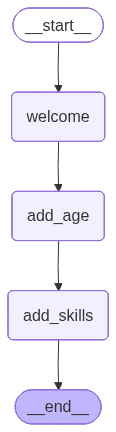

In [5]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
result = app.invoke({'name': 'John Doe', 'age': 35, 'skills' : [ 'C++', 'C#', 'Python', 'AI/ML', 'LangGraph']})

In [9]:
result

{'name': 'John Doe',
 'age': 35,
 'skills': ['C++', 'C#', 'Python', 'AI/ML', 'LangGraph'],
 'final': 'John Doe, welcome to the system! You are 35 years old! Your skills are: C++, C#, Python, AI/ML and LangGraph.'}